In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import nbsetup
from models.load import load, load_components
from references import milkyway as mref


In [2]:
mm = load('mcmillian2011best_800_50')

Loaded mcmillian2011best_800_50


In [336]:
def plot_velocities(self, xlim=(0,25), ylim=(0,250), adjustment=None, *args, **kwargs):
    fig, axes = plt.subplots(1, 1, figsize=(20,10))
    df = self.dataframe(G=False, mass_ratios=False)
    dsum = df.groupby('rd', as_index=False).sum()
    r = dsum['rd'].unique()
    
    for do, style in enumerate(('dotted', 'dashed')):
        
        for component in df['component'].unique():
            dcomp = df.query('component=="%s"' % component)
            adjust = adjustment(dcomp, *args, **kwargs) if do else 1
            vels = velocity(dcomp, adjust)
            sns.lineplot(x=r, y=vels, linestyle=style, label=component)
        
        adjust = adjustment(dsum, *args, **kwargs) if do else 1
        sns.lineplot(x=r, y=velocity(dsum, adjust), label='sum', linestyle='solid')


    # observations
    #axes[0].set(xlim=xlim)
    #if log: axes[0].set(xscale='log')
    for key, obs in mref.observations.items():
        sns.scatterplot(x=obs['radius'], y=np.array(obs['velocity']), label=key).set(xlim=xlim, ylim=ylim)

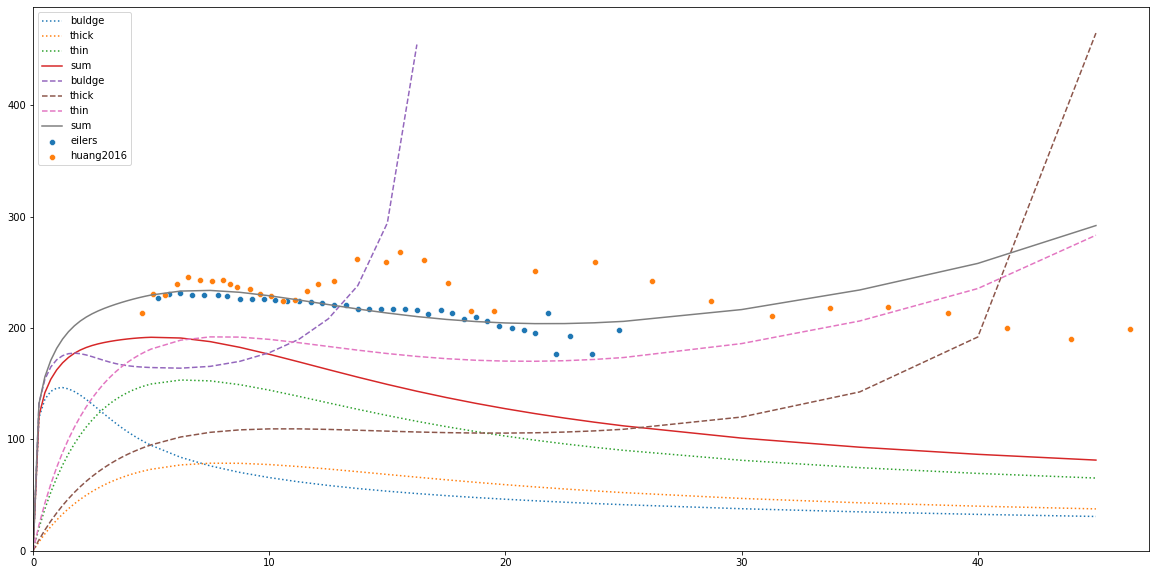

In [618]:
# v = m1/2 standard
# v4 = m want
# therefore v4 = m1/4 = m(1/2)*1/2

def velocity(df, adjust=1, r='rd', dimension='x'):
    return (df[r]*df['%s_vec' % dimension]*adjust)**0.5

def adjustment_original(df, dimension='x', compare_dimension='F', gamma=10, alpha=0.2, epsilon=1):
    nulled = df['%s_abs' % compare_dimension]-df['%s_vec' % dimension]
    return gamma/(1+(epsilon*nulled)**alpha)

def adjustment_log(df, dimension='x', compare_dimension='F', gamma=16, alpha=0.15, epsilon=1):
    nulled = df['%s_abs' % compare_dimension]-df['%s_vec' % dimension]
    return gamma/np.log(nulled/alpha)

def adjustment_abs(df, dimension='x', compare_dimension='F', gamma=20, alpha=0.5, epsilon=1):
    nulled = df['%s_abs' % compare_dimension]-df['%s_vec' % dimension]
    return gamma*df['x_abs']**-0.4

def adjustment_trial(df, dimension='x', compare_dimension='F', gamma=20, alpha=0.5, epsilon=1):
    nulled = df['%s_abs' % compare_dimension]-df['%s_vec' % dimension]
    return gamma*(1+nulled)**-0.5

adjustment=adjustment_log

plot_velocities(mm, adjustment=adjustment, xlim=(0, None), ylim=(0, None))

In [598]:
keys = list(np.linspace(0.5, 5, 5))
sims = {}
for key in keys:
    sims[key] = load("massestest_%s" % key)

Loaded massestest_5.0


<AxesSubplot:>

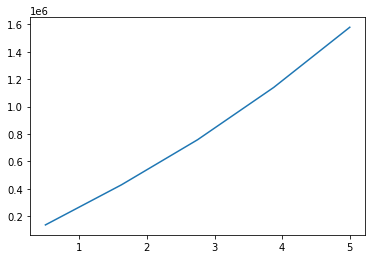

In [605]:
sns.lineplot(x=list(sims.keys()), y=np.array([np.sum(sim.mass_sums)for sim in sims.values()])**0.5)

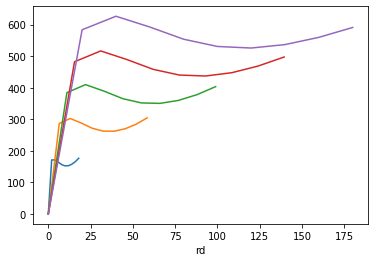

In [619]:
vmax = []
mass = []
for key, value in sims.items():
    df = value.dataframe(mass_ratios=False)
    dsum = df.groupby('rd', as_index=False).sum()
    v = velocity(dsum, adjust=adjustment(dsum))
    sns.lineplot(x=dsum['rd'], y=v)
    vmax.append(v.max())
    mass.append(np.sum(value.mass_sums))

<AxesSubplot:>

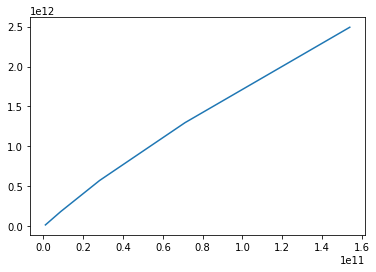

In [620]:
sns.lineplot(x=np.array(vmax)**4, y=np.array(mass))